<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_2_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.090180,63.481865,44.494017,-300413.817778,-300263.751715,107178.356241,-407442.107956
1,0.0,1.0,22.918788,33.108915,52.423665,-93868.447287,-93749.995919,-53149.362679,-40600.633240
2,0.0,2.0,94.260387,56.081862,24.905140,227834.053845,228019.301233,16343.569733,211675.731500
3,0.0,3.0,65.636759,40.752420,51.472793,108561.151982,108729.013954,-52434.529202,161163.543155
4,0.0,4.0,97.137857,54.229049,63.847257,84134.491276,84359.705440,-15660.957134,100020.662574
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.646676,50.978722,26.318548,-37530.942964,-37393.999018,-62338.273502,24944.274484
249996,999.0,246.0,78.779314,34.012604,87.946333,76432.485239,76643.223489,69552.757055,7090.466435
249997,999.0,247.0,61.652474,82.101807,97.484738,316264.231240,316515.470259,212611.964716,103903.505543
249998,999.0,248.0,46.761180,26.524864,30.500874,54539.354158,54653.141076,-54943.883078,109597.024154


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.090180,63.481865,44.494017,-300413.817778,-300263.751715,107178.356241,-407442.107956
1,0.0,1.0,22.918788,33.108915,52.423665,-93868.447287,-93749.995919,-53149.362679,-40600.633240
2,0.0,2.0,94.260387,56.081862,24.905140,227834.053845,228019.301233,16343.569733,211675.731500
3,0.0,3.0,65.636759,40.752420,51.472793,108561.151982,108729.013954,-52434.529202,161163.543155
4,0.0,4.0,97.137857,54.229049,63.847257,84134.491276,84359.705440,-15660.957134,100020.662574
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.646676,50.978722,26.318548,-37530.942964,-37393.999018,-62338.273502,24944.274484
249996,999.0,246.0,78.779314,34.012604,87.946333,76432.485239,76643.223489,69552.757055,7090.466435
249997,999.0,247.0,61.652474,82.101807,97.484738,316264.231240,316515.470259,212611.964716,103903.505543
249998,999.0,248.0,46.761180,26.524864,30.500874,54539.354158,54653.141076,-54943.883078,109597.024154


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...          y_hat          e_hat
rep   index                        ...                              
0.0   0.0    32.090180  63.481865  ...  107178.356241 -407442.107956
      1.0    22.918788  33.108915  ...  -53149.362679  -40600.633240
      2.0    94.260387  56.081862  ...   16343.569733  211675.731500
      3.0    65.636759  40.752420  ...  -52434.529202  161163.543155
      4.0    97.137857  54.229049  ...  -15660.957134  100020.662574
...                ...        ...  ...            ...            ...
999.0 245.0  49.646676  50.978722  ...  -62338.273502   24944.274484
      246.0  78.779314  34.012604  ...   69552.757055    7090.466435
      247.0  61.652474  82.101807  ...  212611.964716  103903.505543
      248.0  46.761180  26.524864  ...  -54943.883078  109597.024154
      249.0  60.073753  40.128998  ...  129045.758851  -56065.360752

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...          y_hat          e_hat
rep   index                        ...                              
0.0   0.0    32.090180  63.481865  ...  107178.356241 -407442.107956
      1.0    22.918788  33.108915  ...  -53149.362679  -40600.633240
      2.0    94.260387  56.081862  ...   16343.569733  211675.731500
      3.0    65.636759  40.752420  ...  -52434.529202  161163.543155
      4.0    97.137857  54.229049  ...  -15660.957134  100020.662574
...                ...        ...  ...            ...            ...
999.0 245.0  49.646676  50.978722  ...  -62338.273502   24944.274484
      246.0  78.779314  34.012604  ...   69552.757055    7090.466435
      247.0  61.652474  82.101807  ...  212611.964716  103903.505543
      248.0  46.761180  26.524864  ...  -54943.883078  109597.024154
      249.0  60.073753  40.128998  ...  129045.758851  -56065.360752

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.090180,63.481865,44.494017,-300413.817778,-300263.751715,107178.356241,-407442.107956
1,0.0,1.0,22.918788,33.108915,52.423665,-93868.447287,-93749.995919,-53149.362679,-40600.633240
2,0.0,2.0,94.260387,56.081862,24.905140,227834.053845,228019.301233,16343.569733,211675.731500
3,0.0,3.0,65.636759,40.752420,51.472793,108561.151982,108729.013954,-52434.529202,161163.543155
4,0.0,4.0,97.137857,54.229049,63.847257,84134.491276,84359.705440,-15660.957134,100020.662574
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.646676,50.978722,26.318548,-37530.942964,-37393.999018,-62338.273502,24944.274484
249996,999.0,246.0,78.779314,34.012604,87.946333,76432.485239,76643.223489,69552.757055,7090.466435
249997,999.0,247.0,61.652474,82.101807,97.484738,316264.231240,316515.470259,212611.964716,103903.505543
249998,999.0,248.0,46.761180,26.524864,30.500874,54539.354158,54653.141076,-54943.883078,109597.024154


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...          y_hat          e_hat
rep   index                        ...                              
0.0   0.0    32.090180  63.481865  ...  107178.356241 -407442.107956
      1.0    22.918788  33.108915  ...  -53149.362679  -40600.633240
      2.0    94.260387  56.081862  ...   16343.569733  211675.731500
      3.0    65.636759  40.752420  ...  -52434.529202  161163.543155
      4.0    97.137857  54.229049  ...  -15660.957134  100020.662574
...                ...        ...  ...            ...            ...
999.0 245.0  49.646676  50.978722  ...  -62338.273502   24944.274484
      246.0  78.779314  34.012604  ...   69552.757055    7090.466435
      247.0  61.652474  82.101807  ...  212611.964716  103903.505543
      248.0  46.761180  26.524864  ...  -54943.883078  109597.024154
      249.0  60.073753  40.128998  ...  129045.758851  -56065.360752

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

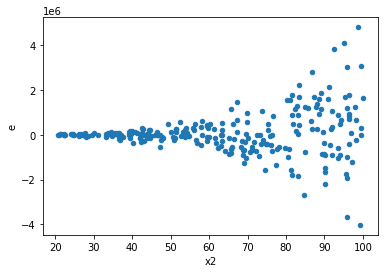

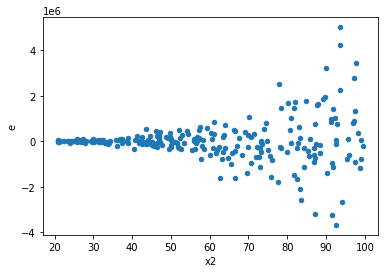

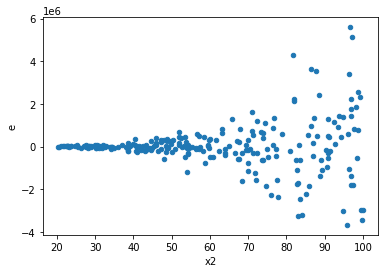

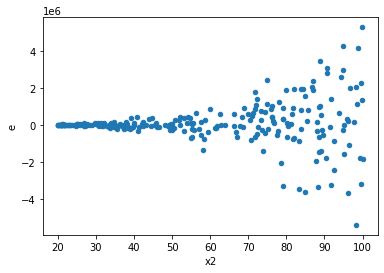

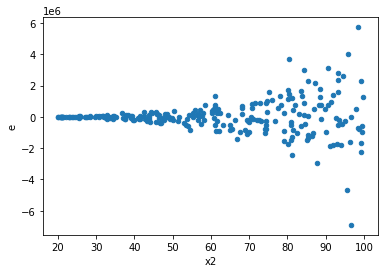

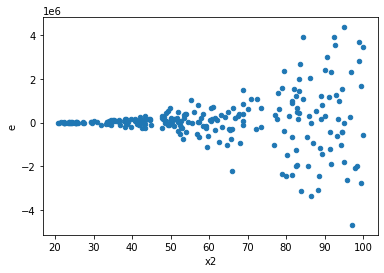

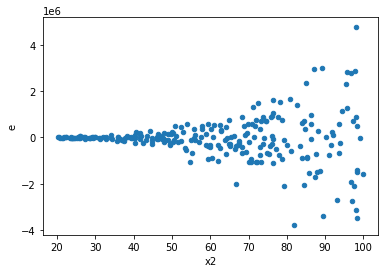

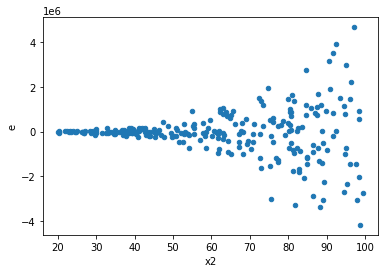

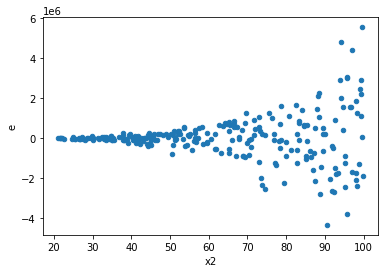

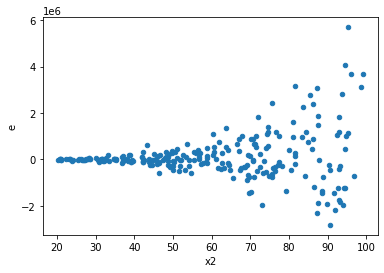

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,214005490008231.97,2626034101683.1484,2229223854252.4165,27354521892.532795,81.49379700403198,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,186736339336675.6,1789750894524.5837,1945170201423.704,18643238484.63108,104.33649727901316,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,308792483121777.7,1791610375508.3154,3216588365851.851,18662608078.21162,172.35470800070976,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,317575142268953.0,1178519734428.778,3308074398634.9272,12276247233.633104,269.4695158608268,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,287215601452157.06,1871184194485.9226,2991829181793.3027,19491502025.895027,153.4940292348209,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,304736607253954.1,1699630969971.5784,3174339658895.3555,17704489270.537273,179.29574868775782,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,207266627606294.28,1843156308138.581,2159027370898.8987,19199544876.443554,112.45200783628307,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,269975161590348.12,2027062576360.3894,2812241266566.1265,21115235170.420723,133.18541062264154,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,303375474891829.2,2570930108293.693,3160161196789.887,26780521961.392635,118.00222569767843,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,214005490008231.97,2626034101683.1484,2229223854252.4165,27354521892.532795,81.49379700403198,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,186736339336675.6,1789750894524.5837,1945170201423.704,18643238484.63108,104.33649727901316,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,308792483121777.7,1791610375508.3154,3216588365851.851,18662608078.21162,172.35470800070976,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,317575142268953.0,1178519734428.778,3308074398634.9272,12276247233.633104,269.4695158608268,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,287215601452157.06,1871184194485.9226,2991829181793.3027,19491502025.895027,153.4940292348209,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,304736607253954.1,1699630969971.5784,3174339658895.3555,17704489270.537273,179.29574868775782,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,207266627606294.28,1843156308138.581,2159027370898.8987,19199544876.443554,112.45200783628307,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,269975161590348.12,2027062576360.3894,2812241266566.1265,21115235170.420723,133.18541062264154,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,303375474891829.2,2570930108293.693,3160161196789.887,26780521961.392635,118.00222569767843,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64